In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

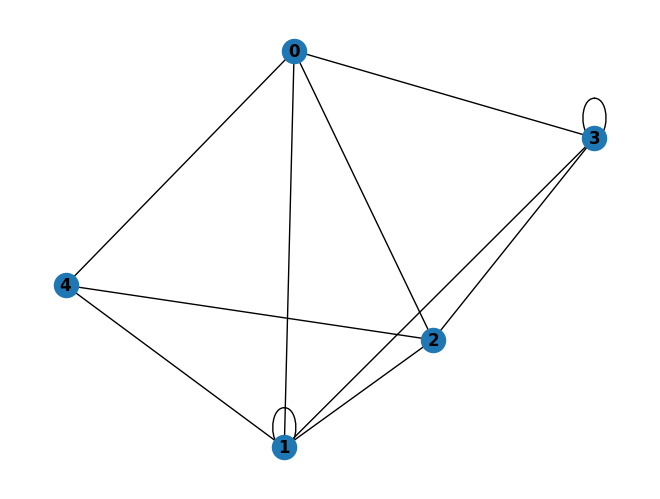

In [2]:
# Generate a random 2D array to represent the adjacency matrix
adjacency_matrix = np.random.randint(2, size=(5, 5))

# Generate corresponding edge list
edges = [(i, j) for i in range(adjacency_matrix.shape[0]) for j in range(adjacency_matrix.shape[1]) if adjacency_matrix[i, j] == 1]
#edges=[(i,j) for i in range(5) for j in range(5)]
# Create a graph from the edge list
G = nx.Graph(edges)

# Visualize the generated graph
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()


In [3]:
edges

[(0, 1),
 (0, 3),
 (1, 1),
 (1, 2),
 (1, 4),
 (2, 0),
 (2, 1),
 (2, 3),
 (2, 4),
 (3, 0),
 (3, 1),
 (3, 2),
 (3, 3),
 (4, 0),
 (4, 1)]

In [4]:
# Define a simple neural network model for graph prediction
model = Sequential([
    Flatten(input_shape=(adjacency_matrix.shape[0], adjacency_matrix.shape[1])),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [5]:
# Generate training data (input is the adjacency matrix, output is the flattened adjacency matrix)
X_train = np.expand_dims(adjacency_matrix, axis=0)
y_train = np.array([[1]])

# Train the model
model.fit(X_train, y_train, epochs=10)


Epoch 1/10
1/1 [==============================] - 1s 543ms/step - loss: 0.9294 - accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 8ms/step - loss: 0.8964 - accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 7ms/step - loss: 0.8643 - accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 6ms/step - loss: 0.8329 - accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 7ms/step - loss: 0.8024 - accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 7ms/step - loss: 0.7727 - accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 5ms/step - loss: 0.7451 - accuracy: 0.0000e+00
Epoch 8/10
1/1 [==============================] - 0s 6ms/step - loss: 0.7196 - accuracy: 0.0000e+00
Epoch 9/10
1/1 [==============================] - 0s 7ms/step - loss: 0.6949 - accuracy: 0.0000e+00
Epoch 10/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6708 - accuracy: 1.0000


In [6]:
np.expand_dims(adjacency_matrix, axis=0)

array([[[0, 1, 0, 1, 0],
        [0, 1, 1, 0, 1],
        [1, 1, 0, 1, 1],
        [1, 1, 1, 1, 0],
        [1, 1, 0, 0, 0]]])

In [8]:
# Generate a prediction for the adjacency matrix
predicted_adjacency = model.predict(X_train)
print(predicted_adjacency)

1/1 [==============================] - 0s 16ms/step
[[0.52161884]]


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# Generate a sample sequence of 2D arrays (you should replace this with your actual data)
# Assuming each array has shape (num_rows, num_cols)
num_sequences = 10 # data points (examples or samples)
sequence_length = 5 # revolutions
num_rows = 3 # Channels/time
num_cols = 3 # time/channels

X = np.random.randint(2, size=(num_sequences, sequence_length, num_rows, num_cols)) # dp

# Generate corresponding binary class labels (0 or 1)
y = np.random.randint(2, size=(num_sequences,))


# Reshape the input to fit the GRU layer
X = X.reshape(num_sequences, sequence_length, -1)

# Define the GRU model
model = Sequential([
    GRU(units=64, input_shape=(sequence_length, num_rows * num_cols), activation='relu'),
    Dense(units=1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=10, batch_size=1)

# Generate a new sequence of 2D arrays for prediction (replace with your actual data)
new_sequence = np.random.randint(2, size=(1, sequence_length, num_rows, num_cols))
new_sequence = new_sequence.reshape(1, sequence_length, -1)

# Make a prediction
predicted_class = model.predict(new_sequence)

# Print the predicted class
print(predicted_class)

Epoch 1/10
10/10 [==============================] - 1s 5ms/step - loss: 0.7036 - accuracy: 0.5000
Epoch 2/10
10/10 [==============================] - 0s 4ms/step - loss: 0.6756 - accuracy: 0.5000
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 0.6590 - accuracy: 0.5000
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 0.6475 - accuracy: 0.7000
Epoch 5/10
10/10 [==============================] - 0s 3ms/step - loss: 0.6304 - accuracy: 0.8000
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 0.6167 - accuracy: 0.8000
Epoch 7/10
10/10 [==============================] - 0s 4ms/step - loss: 0.6053 - accuracy: 1.0000
Epoch 8/10
10/10 [==============================] - 0s 4ms/step - loss: 0.5891 - accuracy: 1.0000
Epoch 9/10
10/10 [==============================] - 0s 3ms/step - loss: 0.5721 - accuracy: 0.9000
Epoch 10/10
1/1 [==============================] - 0s 198ms/step
[[0.49355894]]


In [ ]:
X.shape

(10, 5, 9)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ConvLSTM2D, Dense, Flatten

# Generate a sample sequence of 2D arrays (you should replace this with your actual data)
# Assuming each array has shape (num_rows, num_cols)
num_sequences = 10
sequence_length = 5
num_rows = 3
num_cols = 3
batch_size = 2

X = np.random.randint(2, size=(num_sequences, sequence_length, num_rows, num_cols, 1))

# Generate corresponding binary class labels (0 or 1)
y = np.random.randint(2, size=(num_sequences,))

# Define the ConvLSTM model
model = Sequential([
    ConvLSTM2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(sequence_length, num_rows, num_cols, 1)),
    Flatten(),
    Dense(units=1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=10, batch_size=batch_size)

# Generate a new sequence of 2D arrays for prediction (replace with your actual data)
new_sequences = np.random.randint(2, size=(batch_size, sequence_length, num_rows, num_cols, 1))

# Make predictions
predicted_classes = model.predict(new_sequences)

# Print the predicted classes
print(predicted_classes)


Epoch 1/10
5/5 [==============================] - 2s 19ms/step - loss: 0.6949 - accuracy: 0.4000
Epoch 2/10
5/5 [==============================] - 0s 18ms/step - loss: 0.6886 - accuracy: 0.6000
Epoch 3/10
5/5 [==============================] - 0s 18ms/step - loss: 0.6851 - accuracy: 0.6000
Epoch 4/10
5/5 [==============================] - 0s 19ms/step - loss: 0.6791 - accuracy: 0.6000
Epoch 5/10
5/5 [==============================] - 0s 19ms/step - loss: 0.6751 - accuracy: 0.6000
Epoch 6/10
5/5 [==============================] - 0s 18ms/step - loss: 0.6703 - accuracy: 0.6000
Epoch 7/10
5/5 [==============================] - 0s 17ms/step - loss: 0.6665 - accuracy: 0.6000
Epoch 8/10
5/5 [==============================] - 0s 17ms/step - loss: 0.6635 - accuracy: 0.6000
Epoch 9/10
5/5 [==============================] - 0s 17ms/step - loss: 0.6589 - accuracy: 0.6000
Epoch 10/10
1/1 [==============================] - 0s 368ms/step
[[0.5573791]
 [0.5434735]]


In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense

# Define the adjacency matrix (assuming a connected graph for simplicity)
adjacency_matrix = np.array([[0, 1, 1, 0, 0],
                             [1, 0, 1, 1, 0],
                             [1, 1, 0, 1, 1],
                             [0, 1, 1, 0, 1],
                             [0, 0, 1, 1, 0]], dtype=np.float32)

# Define initial node features (random for demonstration purposes)
initial_features = np.random.rand(5, 1).astype(np.float32)

# Define the target labels (random binary labels for nodes)
target_labels = np.random.randint(2, size=5)

# Define the GCN model
class GCNModel(tf.keras.Model):
    def __init__(self):
        super(GCNModel, self).__init__()
        self.dense1 = Dense(16, activation='relu')
        self.dense2 = Dense(32, activation='relu')
        self.dense3 = Dense(5, activation='softmax')  # Output 5 classes for 5 nodes

    def call(self, inputs):
        x, a = inputs
        x = tf.matmul(tf.transpose(a), tf.matmul(a, x))  # Graph convolution operation
        x = self.dense1(x)
        x = self.dense2(x)
        x = self.dense3(x)
        return x

# Create the adjacency matrix tensor
adjacency_tensor = tf.constant(adjacency_matrix)

# Create the initial features tensor
initial_features_tensor = tf.constant(initial_features)

# Create the target labels tensor
target_labels_tensor = tf.constant(target_labels)

# Create the model
model = GCNModel()

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model (for demonstration purposes, use a single batch)
with tf.GradientTape() as tape:
    logits = model((initial_features_tensor, adjacency_tensor))
    loss_value = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=target_labels_tensor, logits=logits))

grads = tape.gradient(loss_value, model.trainable_variables)
optimizer = tf.optimizers.Adam(learning_rate=0.001)
optimizer.apply_gradients(zip(grads, model.trainable_variables))

# Generate a new graph with more information embedded (for demonstration purposes, generate random features)
new_features = np.random.rand(5, 1).astype(np.float32)
new_features_tensor = tf.constant(new_features)

# Generate the adjacency matrix for the new graph (replace this with your actual adjacency matrix generation)
new_adjacency_matrix = np.random.randint(2, size=(5, 5)).astype(np.float32)
new_adjacency_tensor = tf.constant(new_adjacency_matrix)

# Make a prediction for the new graph
new_logits = model((new_features_tensor, new_adjacency_tensor))
predicted_labels = tf.argmax(new_logits, axis=-1)

print("Predicted Labels:", predicted_labels.numpy())


Predicted Labels: [4 4 4 4 4]


In [11]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense

# Define the adjacency matrix (assuming a connected graph for simplicity)
adjacency_matrix = np.array([[0, 1, 1, 0, 0],
                             [1, 0, 1, 1, 0],
                             [1, 1, 0, 1, 1],
                             [0, 1, 1, 0, 1],
                             [0, 0, 1, 1, 0]], dtype=np.float32)

# Define initial node attributes (random for demonstration purposes)
initial_node_attributes = np.random.rand(5, 3).astype(np.float32)

# Define the GNN model
class GNNModel(tf.keras.Model):
    def __init__(self):
        super(GNNModel, self).__init__()
        self.dense1 = Dense(16, activation='relu')
        self.dense2 = Dense(3, activation='sigmoid')  # Output 3 features for each node

    def call(self, inputs):
        x, a = inputs
        x = tf.matmul(tf.transpose(a), tf.matmul(a, x))  # Graph convolution operation
        #x = self.dense1(x)
        #x = self.dense2(x)
        return x

# Create the adjacency matrix tensor
adjacency_tensor = tf.constant(adjacency_matrix)

# Create the initial node attributes tensor
initial_node_attributes_tensor = tf.constant(initial_node_attributes)

# Create the model
model = GNNModel()

# Define the number of iterations
num_iterations = 5

# Iterate and evolve the graph
current_node_attributes = initial_node_attributes_tensor
for i in range(num_iterations):
    with tf.GradientTape() as tape:
        logits = model((current_node_attributes, adjacency_tensor))
        current_node_attributes = logits  # Update node attributes for the next iteration

# Print the final node attributes
print("Final Node Attributes:")
print(current_node_attributes.numpy())


Final Node Attributes:
[[12845.928 20704.875 21751.666]
 [17194.816 27719.668 29064.219]
 [20445.219 32954.95  34632.176]
 [17214.305 27744.773 29169.225]
 [12833.894 20689.363 21686.766]]
